# 🌐 EOmaps - plot types

In [1]:
import sys
sys.path.append("..")
%matplotlib widget
from eomaps import Maps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from cartopy import crs as ccrs

addtitle =  lambda m, txt: m.figure.ax.text(0.5, 1.05, txt, 
                                            transform = m.figure.ax.transAxes, 
                                            horizontalalignment="center", 
                                            verticalalignment="center", 
                                            fontsize=12, 
                                            bbox=dict(fc=".75", boxstyle='round,pad=.25', ec="none"))

In [2]:
lon, lat = np.linspace(-180, 180, 1000), np.linspace(-90, 90, 1000)
lon, lat = np.meshgrid(lon, lat)

clon, clat = 5, 44
r_inner, r_outer = 10, 22
mask = (np.sqrt((lon - clon)**2 + (lat - clat)**2) <= r_outer) & (np.sqrt((lon - clon)**2 + (lat - clat)**2) >= r_inner)
lon, lat = lon[mask], lat[mask]

data = np.round(lon + lat, 1)
df = pd.DataFrame(dict(lon=lon.flat, lat=lat.flat, data=data.flat))

usedata = df.sample(1000)

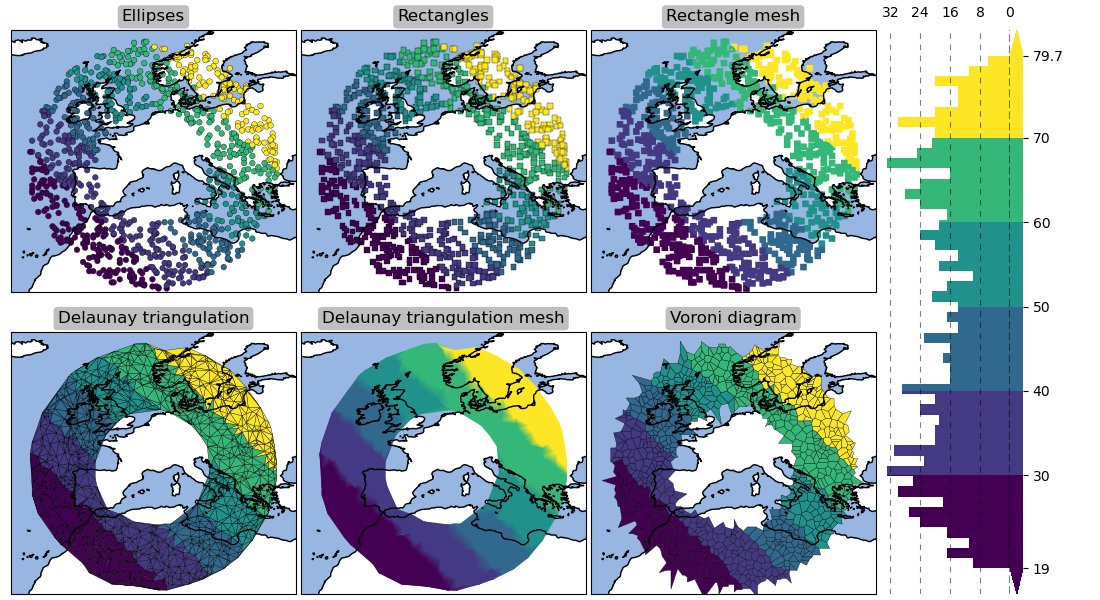

In [21]:
f = plt.figure(figsize=(11, 6))
f.canvas.header_visible = False
f.canvas.footer_visible = False
gs = GridSpec(2, 4, width_ratios=(1,1,1,.5))
gs.update(hspace=0.15, wspace=0.02, left=0.01, right=0.93, bottom=0.01, top=0.95)

m = Maps()
m.set_data(data=usedata, xcoord="lon", ycoord="lat", parameter="data", crs=4326)
m.set_classify_specs(scheme=m.classify_specs.SCHEMES.UserDefined, bins=np.arange(30, 80, 10))
m.set_plot_specs(plot_epsg=4326, title="", histbins=50)

m.set_plot_specs(shape="ellipses", radius=.5)
m.plot_map(f_gridspec=[f, gs[0, 0]], edgecolor="k", linewidth=0.25,orientation="horizontal", colorbar=False, coastlines=True)
addtitle(m, "Ellipses")

m.set_plot_specs(shape="rectangles")
m.plot_map(f_gridspec=[f, gs[0, 1]], edgecolor="k", linewidth=0.25,orientation="horizontal", colorbar=False, coastlines=True)
addtitle(m, "Rectangles")

m.set_plot_specs(shape="trimesh_rectangles")
m.plot_map(f_gridspec=[f, gs[0, 2]], orientation="horizontal", colorbar=False, coastlines=True)
addtitle(m, "Rectangle mesh")

m.set_plot_specs(shape="delauney_triangulation_flat_masked", radius=1.1)
m.plot_map(f_gridspec=[f, gs[1, 0]], edgecolor="k", linewidth=0.25, orientation="horizontal", colorbar=False, coastlines=True)
addtitle(m, "Delaunay triangulation")

m.set_plot_specs(shape="delauney_triangulation_masked", radius=1.1)
m.plot_map(f_gridspec=[f, gs[1, 1]], orientation="horizontal", colorbar=False, coastlines=True)
addtitle(m, "Delaunay triangulation mesh")

m.set_plot_specs(shape="voroni", radius=1.1)
x = m.plot_map(f_gridspec=[f, gs[1, 2]], edgecolor="k", linewidth=0.25, orientation="horizontal", colorbar=False, coastlines=True)
addtitle(m, "Voroni diagram")

for ax in f.axes:
    ax.set_extent((lon.min() - 0.5, lon.max() + 0.5, lat.min() - 0.5, lat.max() + 0.5))
    
m.add_colorbar(gs[:,-1])